In [1]:
import spacy, nltk, gensim, sklearn
import pandas as pd
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases


In [2]:
def create_corpus(quotes):
    #Putting all the quotes in one corpus
    text = ""

    for quote in quotes:
        text = text + ' ' + quote

    #Removing the new lines
    text = " ".join(text.split())
    return text


In [3]:
year = 2020 # available: from 2015 to 2020
PATH_DATA = './data/data_nlp/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 5000

reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

chunks = [] #utile pour plus loins quand on fait le feature extraction
i=0
for chunk in reader:
    df_0 = chunk
    chunks.append(create_corpus(df_0.quotation))
    i = i+1
    if i == 1:
        break
df_0

In [4]:
nlp = spacy.load('en_core_web_sm')
nlp.Defaults.stop_words = []

In [5]:
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw


,0,1,2,3,4
0,a's,able,about,above,according
1,accordingly,across,actually,after,afterwards
2,again,against,ain't,all,allow
3,allows,almost,alone,along,already
4,also,although,always,am,among
...,...,...,...,...,...
104,why,will,willing,wish,with
105,within,without,won't,wonder,would
106,wouldn't,yes,yet,you,you'd
107,you'll,you're,you've,your,yours


In [6]:
#loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

#creating new stopword list
sw_list = list(sw[0]) + list(sw[1]) + list(sw[2]) + list(sw[3]) + list(sw[4]) + list(spacy_stopwords)
nlp.Defaults.stop_words = sw_list


#creating a spacy object
doc = nlp(chunks[0])
sw_list


In [ ]:
tokens = [token.text for token in doc]
len(tokens)

189000

In [ ]:
#number of stopwords detected in text
stop_words = [token.text for token in doc if token.is_stop]



In [21]:
j = 0
words = []
for chunk in reader:
    #creating a spacy object
    doc = nlp(' '.join(chunk.quotation))
    #tokenizer
    tokens = [token.text for token in doc]
    #removing stop words and lematize
    words = words + [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True]
    print(f'{j+1}/250')
    j = j+1
    if j == 3:
        break


In [ ]:
words

['organization',
 'empower',
 'girl',
 'underserved',
 'community',
 'Mother',
 'Nature',
 'help',
 'way',
 'stage',
 'introduce',
 'Tim',
 'Kaine',
 '49',
 'state',
 'know',
 'think',
 'miss',
 'stitch',
 'term',
 'brief',
 'surprised',
 'female',
 'climb',
 'tree',
 'male',
 'try',
 'find',
 'female',
 'mate',
 'form',
 'blessing',
 'liberty',
 'secure',
 'half',
 'half',
 'posterity',
 'people',
 'woman',
 'man',
 'know',
 'sex',
 'talk',
 'miss',
 'husband',
 'assume',
 'smart',
 'figure',
 'smart',
 'know',
 'need',
 'family',
 'handle',
 'set',
 'Troubles',
 'tend',
 'bit',
 'grim',
 'bleak',
 'experience',
 'Derry',
 'child',
 'teenager',
 'joyful',
 'place',
 'hugely',
 'matriarchal',
 'keen',
 'large',
 'varied',
 'cast',
 'female',
 'character',
 'thing',
 'go',
 'Northern',
 'Ireland',
 'time',
 'story',
 'apparently',
 'think',
 'Labor',
 'Day',
 'weekend',
 'mean',
 'LABOR',
 'day',
 'weekend',
 'look',
 'show',
 'week',
 'early',
 'Sept.',
 '4th',
 'welcome',
 'little',
 

In [ ]:
from collections import Counter
# five most common tokens
word_freq = Counter(words)
word_freq.most_common()
print(word_freq.most_common(1000))

[('woman', 21578), ('girl', 9540), ('time', 9406), ('people', 9252), ('year', 9020), ('work', 7902), ('thing', 6488), ('love', 6453), ('life', 6391), ('man', 6207), ('good', 5223), ('family', 5176), ('mother', 5173), ('feel', 5145), ('dollar', 5115), ('lot', 5014), ('great', 4977), ('day', 4965), ('child', 4593), ('play', 4561), ('wife', 4167), ('tell', 3554), ('daughter', 3531), ('young', 3360), ('find', 3357), ('talk', 3343), ('think', 3301), ('want', 3181), ('Clinton', 3174), ('start', 3122), ('support', 3111), ('world', 3095), ('big', 2974), ('make', 2889), ('person', 2830), ('hard', 2760), ('long', 2745), ('friend', 2714), ('bring', 2693), ('home', 2690), ('mom', 2676), ('sex', 2658), ('country', 2600), ('kind', 2574), ('female', 2574), ('run', 2562), ('kid', 2506), ('team', 2475), ('sexual', 2460), ('Hillary', 2446), ('win', 2432), ('sister', 2428), ('state', 2423), ('Trump', 2411), ('leave', 2380), ('live', 2379), ('happen', 2294), ('community', 2227), ('know', 2224), ('million'

***SENTIMENT ANALYSIS USING VADER***

In [5]:


sia = SentimentIntensityAnalyzer()

In [ ]:
#Adding a score column and a coumpound column to every quote
df_0['scores'] = df_0['quotation'].apply(lambda quote: sia.polarity_scores(quote))
df_0['compound']  = df_0['scores'].apply(lambda score_dict: score_dict['compound'])


df_0.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,scores,compound
0,2016-05-16-000278,[ Malia ] knows what she is going to do. They ...,Paul Bryant,[Q2059029],2016-05-16 11:44:37,1,"[[Paul Bryant, 0.9197], [None, 0.0803]]",[http://walb.com/story/31980641/some-colleges-...,E,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.5106
1,2016-12-12-000423,[ t ] o fail to acknowledge even our most basi...,None,[],2016-12-12 16:59:39,1,"[[None, 0.7828], [Tuan Anh, 0.2172]]",[http://cnsnews.com/commentary/lynn-wardle/ark...,E,"{'neg': 0.125, 'neu': 0.794, 'pos': 0.081, 'co...",-0.8012
2,2016-09-23-000654,... the abortion pill really shows how unworka...,None,[],2016-09-23 13:53:34,1,"[[None, 0.9435], [Ruth Coppinger, 0.0565]]",[http://www.universityobserver.ie/news/ruth-co...,E,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp...",-0.5574
3,2016-04-29-000706,[ W ] omen who carry unwanted pregnancies to t...,None,[],2016-04-29 23:17:07,1,"[[None, 0.8603], [Sheila Solon, 0.1397]]",[http://grist.org/living/slide-into-my-dms-and...,E,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'comp...",-0.6369
4,2016-01-01-000274,"(1) the allegations underlying this matter, wh...",None,[],2016-01-01 02:44:51,1,"[[None, 0.7972], [Camille Cosby, 0.2028]]",[http://www.bostonglobe.com/metro/2015/12/31/w...,E,"{'neg': 0.0, 'neu': 0.97, 'pos': 0.03, 'compou...",0.0323


Text(0, 0.5, 'Number of sentences')

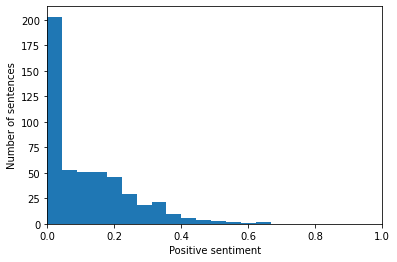

In [ ]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(sia.polarity_scores(quote)['pos']) for quote in df_0.quotation]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])

plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

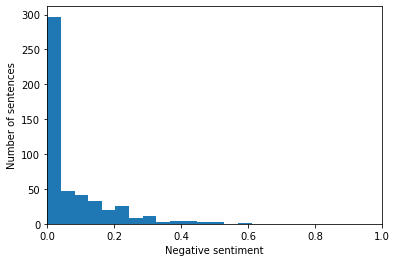

In [ ]:
negative_sent = []
[negative_sent.append(sia.polarity_scores(quote)['neg']) for quote in df_0.quotation]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

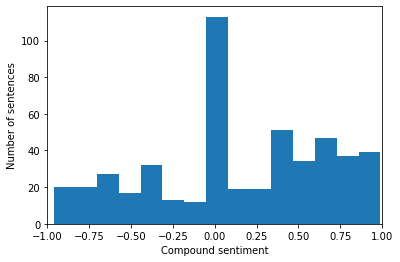

In [ ]:
total_sent = []
[total_sent.append(sia.polarity_scores(quote)['compound']) for quote in df_0.quotation]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [ ]:
sents = [sia.polarity_scores(quote)['compound'] for quote in df_0.quotation]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

Number of positive sentences: 250
Number of negative sentences: 142
Number of neutral sentences: 108


***TOPIC EXTRACTION***

In [4]:
processed_docs = list()
for doc in nlp.pipe(chunks, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in sw_list and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

NameError: name 'nlp' is not defined

In [ ]:
# Add bigrams too

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.


dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 1
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 0
Number of chunks: 1


In [ ]:
# models
from gensim.models import LdaMulticore
from numpy.random import seed as random_seed

seed = 32
params = {'passes': 10, 'random_state': seed}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=4, id2word=dictionary,
                passes=params['passes'], random_state=params['random_state'])

ValueError: cannot compute LDA over an empty collection (no terms)

In [ ]:
model.show_topics(num_words=5)

[(0,
  '0.002*"hope" + 0.002*"public" + 0.002*"role" + 0.001*"lose" + 0.001*"experience"'),
 (1,
  '0.002*"hear" + 0.001*"man_woman" + 0.001*"game" + 0.001*"understand" + 0.001*"real"'),
 (2,
  '0.002*"game" + 0.002*"speak" + 0.001*"lose" + 0.001*"experience" + 0.001*"important"'),
 (3,
  '0.002*"pay" + 0.002*"hear" + 0.002*"role" + 0.002*"week" + 0.001*"money"')]

In [ ]:
model.show_topic(1,20)

[('hear', 0.0015054414),
 ('man_woman', 0.0014470234),
 ('game', 0.0014073072),
 ('understand', 0.0014038304),
 ('real', 0.0013609156),
 ('important', 0.00133403),
 ('experience', 0.0012655016),
 ('ago', 0.0012564727),
 ('money', 0.001180046),
 ('hand', 0.001148428),
 ('Virginia', 0.001141936),
 ('law', 0.0011322527),
 ('fact', 0.001113815),
 ('lady', 0.0011115803),
 ('point', 0.0011059372),
 ('business', 0.0010934245),
 ('month', 0.001091942),
 ('spend', 0.0010683509),
 ('race', 0.001065362),
 ('forward', 0.0010624151)]

In [ ]:
sorted(model[corpus[0]],key=lambda x:x[1],reverse=True)

[(0, 0.9749509), (3, 0.023884308)]

In [ ]:
# plot topics
import pyLDAvis.gensim_models
data =  pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/envs/ada/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/envs/ada/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/envs/ada/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pa